<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [242]:
import pandas as pd
import psycopg2

In [243]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [244]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [245]:
# текст запроса
query_3_1 = f'''
SELECT count(*)
FROM public.vacancies
'''

In [246]:
# результат запроса
df=pd.read_sql_query(query_3_1,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\3934868404.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_3_1,connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [247]:
# текст запроса
query_3_2 = f'''
SELECT count(*)
FROM public.employers
'''

In [248]:
# результат запроса
df=pd.read_sql_query(query_3_2,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\1690494104.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_3_2,connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [249]:
# текст запроса
query_3_3 = f'''
SELECT count(*)
FROM public.areas
'''

In [250]:
# результат запроса
df=pd.read_sql_query(query_3_3,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\22970555.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_3_3,connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [251]:
# текст запроса
query_3_4 = f'''
SELECT count(*)
FROM public.industries
'''

In [252]:
# результат запроса
df=pd.read_sql_query(query_3_4,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\1176412951.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_3_4,connection)


,count
0,294


***

In [253]:
# выводы по предварительному анализу данных
# Количество вакансий - 49 197. 
# Количество работодателей 23 501. 
# Количество регионов - 1 362. 
# Количество сфер деятельности - 294. 
# Данные количественные показатели отражают общее число количества данных в представленной для анализа базе данных. 
# На основе данных цифр можно сделать следующие предположения: 
# 1. у каждого работодателя в среднем по две вакансии, 
# 2. в таблице areas имеет место большее количество повторений.  

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [254]:
# текст запроса
query_4_1 = f'''
SELECT
count(v.id) cnt,
a.name area
FROM public.vacancies v
    JOIN public.areas a on v.area_id=a.id
GROUP BY 2
ORDER BY 1 desc
'''

In [255]:
# результат запроса
df=pd.read_sql_query(query_4_1,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\822709504.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_4_1,connection)


,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [256]:
# текст запроса
query_4_2 = f'''
SELECT
count(v.id) cnt
FROM public.vacancies v
    where (v.salary_from is not null) or (v.salary_to is not null)
'''

In [257]:
# результат запроса
df=pd.read_sql_query(query_4_2,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\3673441779.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_4_2,connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [258]:
# текст запроса
query_4_3 = f'''
SELECT
round (avg(v.salary_from),0) as avg_salary_from,
round (avg(v.salary_to),0) as avg_salary_to
FROM public.vacancies v
'''

In [259]:
# результат запроса
df=pd.read_sql_query(query_4_3,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\1726693057.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_4_3,connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [260]:
# текст запроса
query_4_4 = f'''
SELECT
count(v.id) cnt,
v.schedule,
v.employment
FROM public.vacancies v
GROUP BY 2,3
ORDER BY 1 desc
'''

In [261]:
# результат запроса
df=pd.read_sql_query(query_4_4,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\358812551.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_4_4,connection)


,cnt,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [262]:
# текст запроса
query_4_5 = f'''SELECT
count(v.id),
v.experience "Требуемый опыт работы"
FROM public.vacancies v
where v.experience is not null
GROUP BY 2
ORDER BY 1 asc
'''

In [263]:
# результат запроса
df=pd.read_sql_query(query_4_5,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\1957481088.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_4_5,connection)


,count,Требуемый опыт работы
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

In [264]:
# выводы по детальному анализу вакансий
# 1. Наибольшее количество вакансий в следующих регионах: Москва, Санкт - Петербург, Минск, Новосибирск, Алматы. 
# В тройке лидеров по количеству вакансий присутствуют два города - федерального значения РФ, а также один "город - миллионник" РФ. 
# Стоит отметить, что в представленной выборке данных присутствуют вакансии из других стран, а именно вакансии из Белоруссии и Казахстана, 
# которые являются 3 и 5 по общему количеству вакансий в выборке. 
# 2. У 24 073, т. е. почти половины из общего числа вакансий, указано хотя бы одно значение из зарплатной вилки. 
# 3. Средние значения для нижней и верхней границ зарплатной вилки составляют: 71 065 руб. и 110 537 руб. соответственно. 
# 4. Количество сочетаний типа рабочего графика и типа трудоустройства - 18. 
# Самым популярным является сочетание: Полный день - Полная занятость - 35 367 вакансий. 
# Самым непопулярным: Сменный график - Проектная работа - 1 вакансия. 
# 5. Можно выделить 4 категории требуемого опыта работы: Более 6 лет — Нет опыта — От 3 до 6 лет — От 1 года до 3 лет. 
# Наиболее популярная категория: от 1 года до 3 лет. 
# Наименее популярная: Более 6 лет. 
# Примечательно, что количество вакансий не требующих опыт работы в 5 раз больше, чем количество вакансий требующих опыт более 6 лет. 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [265]:
# текст запроса
query_5_1 = f'''SELECT
e.name "Работодатель",
count(v.id) "Количество вакансий"
FROM public.vacancies v
JOIN public.employers e on v.employer_id=e.id
GROUP BY 1
ORDER BY 2 desc
limit 5
'''


In [266]:
# результат запроса
df=pd.read_sql_query(query_5_1,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\272987338.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_5_1,connection)


,Работодатель,Количество вакансий
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [267]:
# текст запроса
query_5_2 = f'''SELECT
a.name "Регион",
count(e.id) "Количество работодателей",
count(v.id) "Количество вакансий"
FROM public.areas a 
JOIN public.employers e on a.id=e.area
left JOIN public.vacancies v on a.id=v.area_id
where v.id is null
GROUP BY 1
ORDER BY 2 desc
'''

In [268]:
# результат запроса
df=pd.read_sql_query(query_5_2,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\1064199852.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_5_2,connection)


,Регион,Количество работодателей,Количество вакансий
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
181,Миллерово,1,0
182,"Михайловка (Уфимский район, Башкортостан)",1,0
183,Можайск,1,0
184,Морозовск\n,1,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [269]:
# текст запроса
query_5_3 = f'''SELECT
e.name "Работодатель",
count(distinct v.area_id) "Количество регионов"
FROM public.employers e 
JOIN public.vacancies v on e.id=v.employer_id
GROUP BY 1
ORDER BY 2 desc
'''

In [270]:
# результат запроса
df=pd.read_sql_query(query_5_3,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\2025193275.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_5_3,connection)


,Работодатель,Количество регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [271]:
# текст запроса
query_5_4 = f'''SELECT
count(e.id) "Количество работодателей"
FROM public.employers e 
left JOIN public.employers_industries e_i on e.id=e_i.employer_id
where e_i.employer_id is null
'''

In [272]:
# результат запроса
df=pd.read_sql_query(query_5_4,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\832692218.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_5_4,connection)


,Количество работодателей
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [273]:
# текст запроса
query_5_5 = f'''SELECT
e.name "Название компании",
count(e_i.employer_id) "Количество сфер деятельности"
FROM public.employers e 
JOIN public.employers_industries e_i on e.id=e_i.employer_id
GROUP BY 1 
having count (e_i.employer_id)=4 
ORDER BY 1 asc
limit 3
'''

In [274]:
# результат запроса
df=pd.read_sql_query(query_5_5,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\3818282103.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_5_5,connection)


,Название компании,Количество сфер деятельности
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [275]:
# текст запроса
query_5_6 = f'''SELECT
count(e_i.employer_id) "Количество работодателей"
FROM public.employers_industries e_i
JOIN public.industries i on e_i.industry_id=i.id
where i.name = 'Разработка программного обеспечения'
'''

In [276]:
# результат запроса
df=pd.read_sql_query(query_5_6,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\2601531055.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_5_6,connection)


,Количество работодателей
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [277]:
# код для получения списка городов-милионников
import requests 
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России' 
response = requests.get(url) 
display(response)

<Response [200]>

In [278]:
# текст запроса

In [279]:
# результат запроса

***

In [280]:
# выводы по анализу работодателей
# Работодатели с наибольшим количеством вакансий: Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть. Все компании являются российскими. 
# Регионы по количеству работодателей без размещенных вакансий: Россия, Казахстан, Московская область. 
# Данная информация неинформативна, т. к. в данных региона указаны и страны, и области, и конкретные города. 
# Компании Яндекс, Ростелеком имеют наибольшее количество вакансий в разных регионах: 181 и 152 региона соответственно. 
# В приведенной выборке данных без указания сферы деятельности оказалось 8 419 работодателей, а это примерно 35 % от общего числа работодателей (8419/23501*100). 
# Компании, имеющие 4 сферы деятельности: 101 Интернет, 21vek.by, 2ГИС. 
# У 3 553 работодателей сферой деятельности указана "Разработка программного обеспечения".

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [281]:
# текст запроса
query_6_1 = f'''SELECT
count(v.id) "Количество вакансий, связанных с данными"
FROM public.vacancies v
where lower(v.name) like '%data%' or lower(v.name) like '%данн%'
'''

In [282]:
# результат запроса
df=pd.read_sql_query(query_6_1,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\1254506438.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_6_1,connection)


,"Количество вакансий, связанных с д"
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [283]:
# текст запроса
query_6_2 = f'''SELECT Count(v.id) "Количество вакансий для начинающего дата-сайентиста" 
FROM public.vacancies v
WHERE (v.name ILIKE '%data scientist%'
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%%'
    OR (upper(v.name) LIKE '%ML%' AND upper(v.name) NOT LIKE '%HTML%'))
AND (v.name ILIKE '%junior%' OR experience = 'Нет опыта' OR employment = 'Стажировка')
'''

In [284]:
# результат запроса
df=pd.read_sql_query(query_6_2,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\4021069528.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_6_2,connection)


,Количество вакансий для начинающе
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [285]:
# текст запроса
query_6_3 = f'''SELECT Count(v.id) "Количество вакансий c SQL, postgres" 
FROM public.vacancies v
WHERE (v.name ILIKE '%data scientist%'
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%%'
    OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
AND (upper(v.key_skills) LIKE '%SQL%' OR lower(v.key_skills) LIKE '%postgres%')
'''

In [286]:
# результат запроса
df=pd.read_sql_query(query_6_3,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\1963059904.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_6_3,connection)


,"Количество вакансий c SQL, postgres"
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [287]:
# текст запроса
query_6_4 = f'''SELECT Count(v.id) "Количество вакансий c Python" 
FROM public.vacancies v
WHERE (v.name ILIKE '%data scientist%'
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%%'
    OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
AND (v.key_skills ILIKE '%Python%')
'''

In [288]:
# результат запроса
df=pd.read_sql_query(query_6_4,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\2414755332.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_6_4,connection)


,Количество вакансий c Python
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [289]:
# текст запроса
query_6_5 = f'''SELECT 
ROUND(AVG(1 + length(key_skills) - length(Replace(key_skills, CHR(9), ''))), 2) "Среднее количество навыков для DS"
FROM public.vacancies v
WHERE (v.name ILIKE '%data scientist%'
    OR v.name ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%%'
    OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%'))
'''


In [290]:
# результат запроса
df=pd.read_sql_query(query_6_5,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\3315712578.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_6_5,connection)


,Среднее количество навыков для DS
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос SELECT 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `SELECT 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [291]:
# текст запроса
query_6_6 = f'''SELECT 
round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to))) "Средняя заработная плата",
v.experience "Опыт работы"
FROM public.vacancies v
where 
(name ilike '%data scientist%'
or name ilike '%data science%'
or name ilike '%исследователь данных%'
or (name like '%ML%' and name not like '%HTML%') 
or name ilike '%machine learning%'
or name ilike '%машинн%обучен%%')
and (salary_to IS NOT NULL OR salary_from IS NOT NULL)
GROUP BY 2
ORDER BY 1 asc
'''

In [292]:
# результат запроса
df=pd.read_sql_query(query_6_6,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\3337973247.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_6_6,connection)


,Средняя заработная плата,Опыт работы
0,74643.0,Нет опыта
1,139675.0,От 1 года до 3 лет
2,243115.0,От 3 до 6 лет


***

In [293]:
# выводы по предметному анализу
# Вакансий, имеющих отношение к данным - 1771, что составляет 3,6 % от общего количества вакансий (1771/49197*100). 
# Для начинающих дата - сайентистов выбрано 51 вакансия, не требующая опыта работы и с типом работы - стажировка. 
# Это примерно 2,9 % от общего числа вакансий, имеющих отношение к данным. 
# Вне зависимости от опыта работы количество вакансий, имеющих отношение к данным, с ключевыми навыками "SQL или postgres" или "Python"составляет 201 и 351 соответственно. 
# Можно сделать вывод о том, что "Python" более распространен среди ключевых требований, т.е. чаще встречается работа с "Python". 
# Среднее количество навыков для дата-сайентистов составляет 6. В зависимости от опыта работы средняя заработная плата специалиста работающего с данными увеличивается. 
# Верхнего предела по заработной плате для специалиста с опытом работы больше 6 лет не указано.


# Общий вывод по проекту

# подведем итог исследования, обобщите выводы
Количество вакансий - 49 197. 
Количество работодателей 23 501. 
Количество регионов - 1 362. 
Количество сфер деятельности - 294. 
Наибольшее количество вакансий в следующих регионах: Москва, Санкт - Петербург, Минск, Новосибирск, Алматы. В тройке лидеров по количеству вакансий присутствуют два города - федерального значения РФ, а также один "город - миллионник" РФ. Стоит отметить, что в представленной выборке данных присутствуют вакансии из других стран, а именно вакансии из Белоруссии и Казахстана, которые являются 3 и 5 по общему количеству вакансий в выборке. 
У 24 073, т. е. почти половины из общего числа вакансий, указано хотя бы одно значение из зарплатной вилки. Средние значения для нижней и верхней границ зарплатной вилки составляют: 71 065 руб. и 110 537 руб. соответственно.  
Самым популярным является сочетание типа рабочего графика и типа трудоустройства: Полный день - Полная занятость - 35 367 вакансий.  Самым непопулярным: Сменный график - Проектная работа - 1 вакансия. 
Примечательно, что количество вакансий не требующих опыт работы в 5 раз больше, чем количество вакансий требующих опыт более 6 лет. 
Работодатели с наибольшим количеством вакансий: Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть. Все компании являются российскими. 
Регионы по количеству работодателей без размещенных вакансий: Россия, Казахстан, Московская область. Данная информация неинформативна, т. к. в данных региона указаны и страны, и области, и конкретные города. Компании Яндекс, Ростелеком имеют наибольшее количество вакансий в разных регионах: 181 и 152 региона соответственно. 
В приведенной выборке данных без указания сферы деятельности оказалось 8 419 работодателей, а это примерно 35 % от общего числа работодателей (8419/23501*100). 
У 3 553 работодателей сферой деятельности указана "Разработка программного обеспечения". Вакансий, имеющих отношение к данным - 1771, что составляет 3,6 % от общего количества вакансий (1771/49197*100). Для начинающих дата - сайентистов выбрано 51 вакансия, не требующая опыта работы и с типом работы - стажировка. Это примерно 2,9 % от общего числа вакансий, имеющих отношение к данным. 
Вне зависимости от опыта работы количество вакансий, имеющих отношение к данным, с ключевыми навыками "SQL или postgres" или "Python"составляет 201 и 351 соответственно. Можно сделать вывод о том, что "Python" более распространен среди ключевых требований, т.е. чаще встречается работа с "Python". 
Среднее количество навыков для дата-сайентистов составляет 6. В зависимости от опыта работы средняя заработная плата специалиста работающего с данными увеличивается. Верхнего предела по заработной плате для специалиста с опытом работы больше 6 лет не указано.

# дополнительные исследования

In [294]:
query_7_1 = f'''SELECT 
    v.name "Наименование вакансии", 
    Count(*) "Количество вакансий"
    FROM public.vacancies v
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 10
'''
df=pd.read_sql_query(query_7_1,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\2720430367.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_7_1,connection)


,Наименование вакансии,Количество вакансий
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
5,Аналитик,404
6,Инженер-программист,389
7,Программист 1C,360
8,Frontend-разработчик,242
9,Инженер технической поддержки,230


В топ-10 вакансий входят вакансии, связанные с программированием. Это говорит о востребоваанности и популярности данного направления. Для наглядности построим круговую диаграмму. Почти 30 % вакансий из топ-10 - вакансии системного администратора. Бизнес - аналитика занимает 3 место в топе, примерно на 0,9% меньше вакансий Системного аналитика. Количество вакансий Аналитика примерно равно вакансиям Системного аналитика. Тот факт, что в топ-10 вакансий присутсвуют вакансии, связанные с аналитикой показывают востребованность данного направления. 

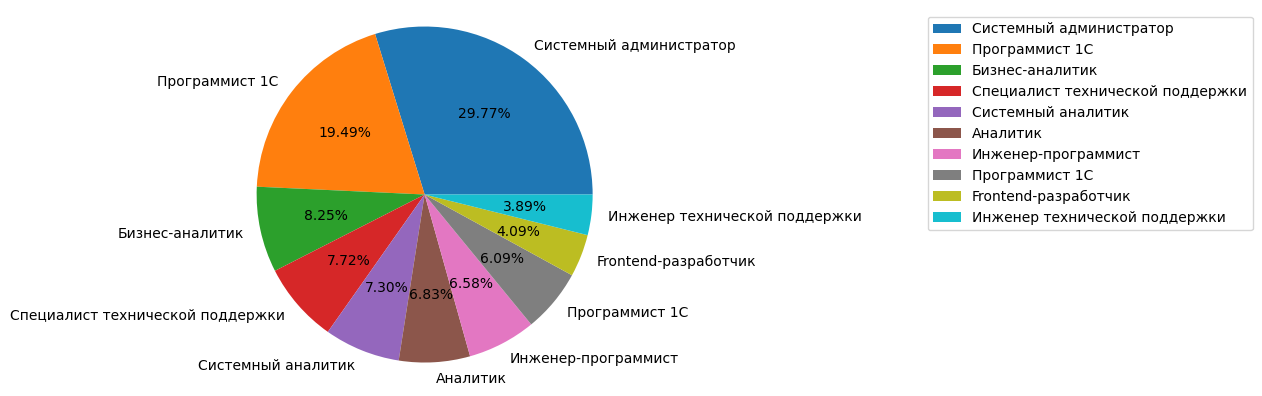

In [295]:
import matplotlib.pyplot as plt
labels=df['Наименование вакансии']
values=df['Количество вакансий']
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(values, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.5, 1.0))
plt.show()

In [296]:
#Для анализа самых популярных сфер деятельсти по количеству вакансий составим следующий запрос.
query_7_2 = f'''SELECT 
i.name "Сфера",
count(v.id) "Количество вакансий"
FROM public.industries i
join public.employers_industries e_i on i.id=e_i.industry_id
join public.vacancies v on e_i.employer_id=v.employer_id
where (salary_to IS NOT NULL OR salary_from IS NOT NULL)
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5 
'''
df=pd.read_sql_query(query_7_2,connection)
df

C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\4081998093.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_7_2,connection)


,Сфера,Количество вакансий
0,Разработка программного обеспечения,4572
1,"Системная интеграция, автоматизации технологи...",4142
2,"Интернет-компания (поисковики, платежные систе...",3387
3,Мобильная связь,742
4,Кадровые агентства,711


По результатам запроса можно сделать вывод о том, что наибольшее количество вакансий находится в сфере разработки программного обеспечения (36 % от общего числа вакансий).

In [304]:
#Проанализируем размер заработной платы в наиболее популярных сферах.
query_7_3 = f'''SELECT 
i.name "Сфера",
round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to))) "Средняя заработная плата",
count(v.id) "Количество вакансий"
FROM public.industries i
join public.employers_industries e_i on i.id=e_i.industry_id
join public.vacancies v on e_i.employer_id=v.employer_id
where (salary_to IS NOT NULL OR salary_from IS NOT NULL)
GROUP BY 1 
ORDER BY 2 desc
LIMIT 15
'''
df=pd.read_sql_query(query_7_3,connection)
df


C:\Users\Irina\AppData\Local\Temp\ipykernel_16724\3305897224.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_7_3,connection)


,Сфера,Средняя заработная плата,Количество вакансий
0,"Агрохимия (продвижение, оптовая торговля)",381429.0,14
1,Агрохимия (производство),339875.0,16
2,Игорный бизнес,191905.0,20
3,Корма для животных (производство),168300.0,29
4,Зоомагазин,167613.0,31
5,Кадровые агентства,144530.0,711
6,"Лакокрасочная продукция, сырье (производство)",142803.0,26
7,"Бытовая химия, парфюмерия, косметика (произво...",130120.0,78
8,"Лакокрасочная продукция, сырье (продвижение, о...",128445.0,32
9,"Дорожно-строительная техника, сельскохозяйстве...",122878.0,90


Средняя заработная плата больше в Сферах, связанных с производством (Агрохимия, лакокрасочная продукция, бытовая химия) нежели чем в Разработке ПО, это  связано с тем, что на производство чаще всего требуются узкопрофильные "дорогие" специалисты. 